In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [15]:
df = pd.read_csv('../data/raw/train.csv')
print("The data is read.")

The data is read.


In [16]:
df.shape

(1460, 81)

In [18]:
df.GarageCars.dtypes

dtype('int64')

## Outlier Handling

<AxesSubplot:xlabel='SalePrice'>

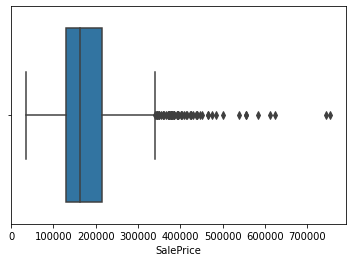

In [4]:
sns.boxplot(x = df['SalePrice'])

In [5]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
IQR = q3 - q1

In [6]:
new_bound = q3 + 3*IQR

In [7]:
df.drop(df[df.SalePrice > new_bound].index, axis = 0, inplace = True)

In [8]:
df.shape

(1448, 81)

<AxesSubplot:xlabel='SalePrice'>

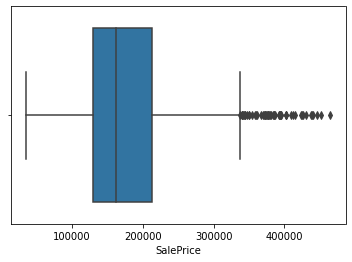

In [9]:
sns.boxplot(x = df['SalePrice'])

## Removing columns

In [11]:
to_remove = ['GarageCars','1stFlrSF','GrLivArea','FullBath']

null_val = df.isnull().sum()
null_val = null_val[null_val.values > df.shape[0]*0.2]
to_remove = np.append(to_remove, null_val.index.to_list())

num_df = df.select_dtypes(include = [np.number])
corr_mat = num_df.corr()
corr_mat = corr_mat.SalePrice.sort_values(ascending = False)
poor_corr = corr_mat[(corr_mat.values < 0.35) & (corr_mat.values > -0.03)]
to_remove = np.append(to_remove, poor_corr.index.to_list())

In [13]:
to_remove

array(['GarageCars', '1stFlrSF', 'GrLivArea', 'FullBath', 'Alley',
       'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'MiscVal'],
      dtype='<U12')

In [248]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [249]:
null_val = df.isnull().sum()
null_val = null_val[null_val > 0.2*1148]
null_val.sort_values(inplace = True)

In [250]:
null_val

LotFrontage     258
FireplaceQu     690
Fence          1169
Alley          1357
MiscFeature    1394
PoolQC         1442
dtype: int64

In [251]:
numeric_features.corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.800000
GrLivArea        0.679068
GarageCars       0.653663
GarageArea       0.632507
TotalBsmtSF      0.594397
1stFlrSF         0.584448
YearBuilt        0.556740
FullBath         0.552082
YearRemodAdd     0.534765
GarageYrBlt      0.508040
TotRmsAbvGrd     0.502738
Fireplaces       0.461581
MasVnrArea       0.433622
BsmtFinSF1       0.364725
LotFrontage      0.336667
WoodDeckSF       0.334476
OpenPorchSF      0.325409
2ndFlrSF         0.287455
HalfBath         0.278858
LotArea          0.252031
BsmtFullBath     0.242846
BsmtUnfSF        0.211252
BedroomAbvGr     0.164610
ScreenPorch      0.081308
MoSold           0.079185
3SsnPorch        0.055720
PoolArea         0.033403
BsmtFinSF2      -0.011770
MiscVal         -0.019849
BsmtHalfBath    -0.031552
YrSold          -0.034292
Id              -0.034666
LowQualFinSF    -0.060257
OverallCond     -0.079676
MSSubClass      -0.086540
EnclosedPorch   -0.128520
KitchenAbvGr    -0.143610
Name: SalePr

In [252]:
arr = []

In [253]:
corr_m = numeric_features.corr()
corr_m = corr_m['SalePrice'].sort_values(ascending = False)
poor_cor = corr_m[(corr_m.values < 0.35) & (corr_m.values > -0.03)]
arr = np.append(arr, poor_cor.index.to_list())

In [254]:
arr

array(['LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal'], dtype='<U32')

In [255]:
to_remove = ['GarageCars','1stFlrSF','GrLivArea','FullBath','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal', 'BsmtHalfBath', 'YrSold', 'Id', 'LowQualFinSF',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr','LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']

In [256]:
df.drop(to_remove,axis = 1,inplace = True)

In [257]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000


In [258]:
numeric_col = df.select_dtypes(include = [np.number]).columns.to_list()
num_col_x = numeric_col[:-1]
num_col_y = numeric_col[-1]
scaler_x = StandardScaler()
scaled_x_df = scaler_x.fit_transform(df[num_col_x])
scaler_y = StandardScaler()
scaled_y_df = scaler_y.fit_transform(df[num_col_y].values.reshape(-1, 1))

file1 = open('../models/data-cleaning-models/scaler_x.pkl', 'wb')
pickle.dump(cat_encoder, file1)

file2 = open('../models/data-cleaning-models/scaler_y.pkl', 'wb')
pickle.dump(cat_encoder, file2)

df[num_col_x],df[num_col_y] = scaled_x_df, scaled_y_df

In [259]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,1.001096,RFn,0.369164,TA,TA,Y,WD,Normal,0.436537
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,-0.092989,RFn,-0.046740,TA,TA,Y,WD,Normal,0.054391
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,0.920052,RFn,0.652735,TA,TA,Y,WD,Normal,0.648840
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,0.798487,Unf,0.813425,TA,TA,Y,WD,Abnorml,-0.532981
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,0.879531,RFn,1.730303,TA,TA,Y,WD,Normal,1.023909


In [260]:
df.dropna(inplace = True)

In [261]:
df.shape

(1326, 49)

## Categorical features encoding

In [262]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_columns = df.select_dtypes(include = ['object']).columns.to_list()
cat_encoder = {}
for i in cat_columns:
    en = LabelEncoder()
    df[i] = en.fit_transform(df[i])
    cat_encoder[i] = en

file = open('../models/data-cleaning-models/cat_encoder.pkl', 'wb')
pickle.dump(cat_encoder, file)

In [263]:
cat_col = df.select_dtypes(include = ['object']).columns.to_list()

In [264]:
df[cat_col].dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [265]:
cat_encoder = { }

for i in cat_col:
    encoder = LabelEncoder()
    df[i]= encoder.fit_transform(df[i])
    cat_encoder[i]= encoder

In [266]:
cat_encoder

{'MSZoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'LotShape': LabelEncoder(),
 'LandContour': LabelEncoder(),
 'Utilities': LabelEncoder(),
 'LotConfig': LabelEncoder(),
 'LandSlope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition1': LabelEncoder(),
 'Condition2': LabelEncoder(),
 'BldgType': LabelEncoder(),
 'HouseStyle': LabelEncoder(),
 'RoofStyle': LabelEncoder(),
 'RoofMatl': LabelEncoder(),
 'Exterior1st': LabelEncoder(),
 'Exterior2nd': LabelEncoder(),
 'MasVnrType': LabelEncoder(),
 'ExterQual': LabelEncoder(),
 'ExterCond': LabelEncoder(),
 'Foundation': LabelEncoder(),
 'BsmtQual': LabelEncoder(),
 'BsmtCond': LabelEncoder(),
 'BsmtExposure': LabelEncoder(),
 'BsmtFinType1': LabelEncoder(),
 'BsmtFinType2': LabelEncoder(),
 'Heating': LabelEncoder(),
 'HeatingQC': LabelEncoder(),
 'CentralAir': LabelEncoder(),
 'Electrical': LabelEncoder(),
 'KitchenQual': LabelEncoder(),
 'Functional': LabelEncoder(),
 'GarageType': LabelEncoder(),
 'GarageFinish': Label

In [267]:
df.to_csv("../data/processed/clean_train_data.csv", index = False)

In [268]:
import pickle

In [269]:
file = open('../models/data-cleaning-models/cat_encoder.pkl', 'wb')
pickle.dump(cat_encoder, file)

In [282]:
file1 = open('../models/data-cleaning-models/scaler_x.pkl', 'wb')
pickle.dump(scaler_x, file1)

file2 = open('../models/data-cleaning-models/scaler_y.pkl', 'wb')
pickle.dump(scaler_y, file2)

## Cleaning Test dataset

In [271]:
df_test = pd.read_csv('../data/raw/test.csv')
print("The data is read.")

The data is read.


In [272]:
df_test.drop(to_remove, axis = 1, inplace = True)

In [273]:
df_test.shape

(1459, 48)

In [274]:
df_test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,0,Attchd,1961.0,Unf,730.0,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0,Attchd,1958.0,Unf,312.0,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1,Attchd,1997.0,Fin,482.0,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1,Attchd,1998.0,Fin,470.0,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0,Attchd,1992.0,RFn,506.0,TA,TA,Y,WD,Normal


In [275]:
numeric_col = df_test.select_dtypes(include = [np.number]).columns.to_list()
scaled_x_df_test = scaler_x.fit_transform(df_test[num_col_x])

df_test[num_col_x]= scaled_x_df_test

In [276]:
df_test.dropna(inplace = True)

In [277]:
for i in cat_col:
    encoder = cat_encoder[i]
    df_test[i]= encoder.fit_transform(df_test[i])

In [278]:
df_test.to_csv('../data/processed/clean_test_data.csv',index = False)

In [279]:
df_test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,-0.898055,1,-0.632862,2,1.185538,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,-0.898055,1,-0.746405,2,-0.740959,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,0.647066,1,0.729660,0,0.042545,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,0.647066,1,0.767508,0,-0.012761,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,-0.898055,1,0.540421,1,0.153157,3,4,2,8,4
